# Total vs partial derivatives

## Main message
Partial derivatives involve only individual components. Total derivatives are the derivatives of an objective or constraint with respect to design variables.

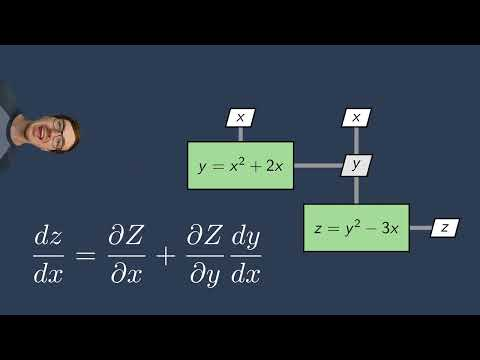

In [1]:
from IPython.display import YouTubeVideo; YouTubeVideo('glwDpYFg1YQ', width=1024, height=576)

## What are partial derivatives?
Partial derivatives are the sensitivities of the outputs with respect to the inputs for a small chunk of the model (components in OpenMDAO speak). These are commonly called "partials" for short. Partials are generally easier to compute compared to total derivatives because they include only the immediate sensitivities of the outputs with respect to the inputs without considering the influence of other parts of the model.

Let me show you a simple algebraic example of this:

$$
f(x, y(x)) = x^2 + y
$$

$$
y(x) = x + 2
$$

$$
\frac{\partial f}{\partial x} = 2x
$$

Despite the fact that $f$ depends on $y$ and $y$ depends on $x$, $\frac{\partial f}{\partial x} = 2x$ because the partial doesn't include contributions from $y$. You could think of each of these two equations as components in a model and partials only care about the sensitivities for one sub-part of the model.

## What are total derivatives?
Total derivatives capture the full sensitivity of the model outputs with respect to the inputs (functions of interest with respect to the design variables). These are generally harder to compute than partial derivatives because of the additional complexity needed in computing them. You have to consider all parts of the model that influence the outputs, leading to the entire model potentially having an impact on the total derivatives.

Let's revisit those same equations from above:

$$
f(x, y(x)) = x^2 + y
$$

$$
y(x) = x + 2
$$

We can rewrite this set of equations via substitution as:

$$
f(x, y(x)) = x^2 + y = x^2 + x + 2
$$

Then, differentiating, we get:

$$
\frac{d f}{d x} = 2x + 1
$$

For totals, the influence from $y$ affects the derivative of $f$ with respect to $x$, unlike partials.

## You can compute total derivatives using a mix of partial derivative computation methods
OpenMDAO handles total derivative computation based on your supplied partials. You don't have to compute total derivatives directly. Instead, you compute partial derivatives however you want and pass that information to OpenMDAO, who then combines them based on your model hierarchy. You can use a heterogeneous setup of a partial derivative computations and that's A-okay -- OpenMDAO will combine them accordingly.

The OpenMDAO docs have a comprehensive page on [How Total Derivatives are Computed](https://openmdao.org/twodocs/versions/latest/theory_manual/total_derivs_theory.html) that you should check out for more theory and a deeper explanation of what's going on behind the scenes.